In [1]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data and applied clustering techniques

In [2]:
data = pd.read_csv('./data/1_5_CPMcutoff_suffix_1_log.csv', index_col=0)
data.head()

,C42_1,C42B_1,LNCAP_1,MR49F_1
gene,,,,
ENSG00000000003,2.020308,5.802458,3.463763,3.090618
ENSG00000000419,4.223350,7.149923,5.323355,2.755359
ENSG00000000457,2.869919,1.596058,3.677716,4.178899
ENSG00000000460,1.751904,3.421740,3.052585,3.070865
ENSG00000001036,3.481197,5.683603,5.241517,4.872132


In [3]:
%%time
clustering = SpectralClustering(n_clusters=9,
        assign_labels='discretize',
        random_state=0).fit(data.values)

CPU times: user 4min 9s, sys: 29.3 s, total: 4min 38s
Wall time: 3min 19s


In [4]:
posteriors = pd.read_csv("./results/posteriors_1_5_CPMcutoff_suffix_1_log_it_1000_npEM.csv",index_col=0)
clusters_np = np.argmax(posteriors.values,axis = 1)
clusters_spect = clustering.labels_
X = data.values
X_embedded = TSNE(n_components=2).fit_transform(X)

# Visualization comparing ```npEM``` with ```SpectralClustering```

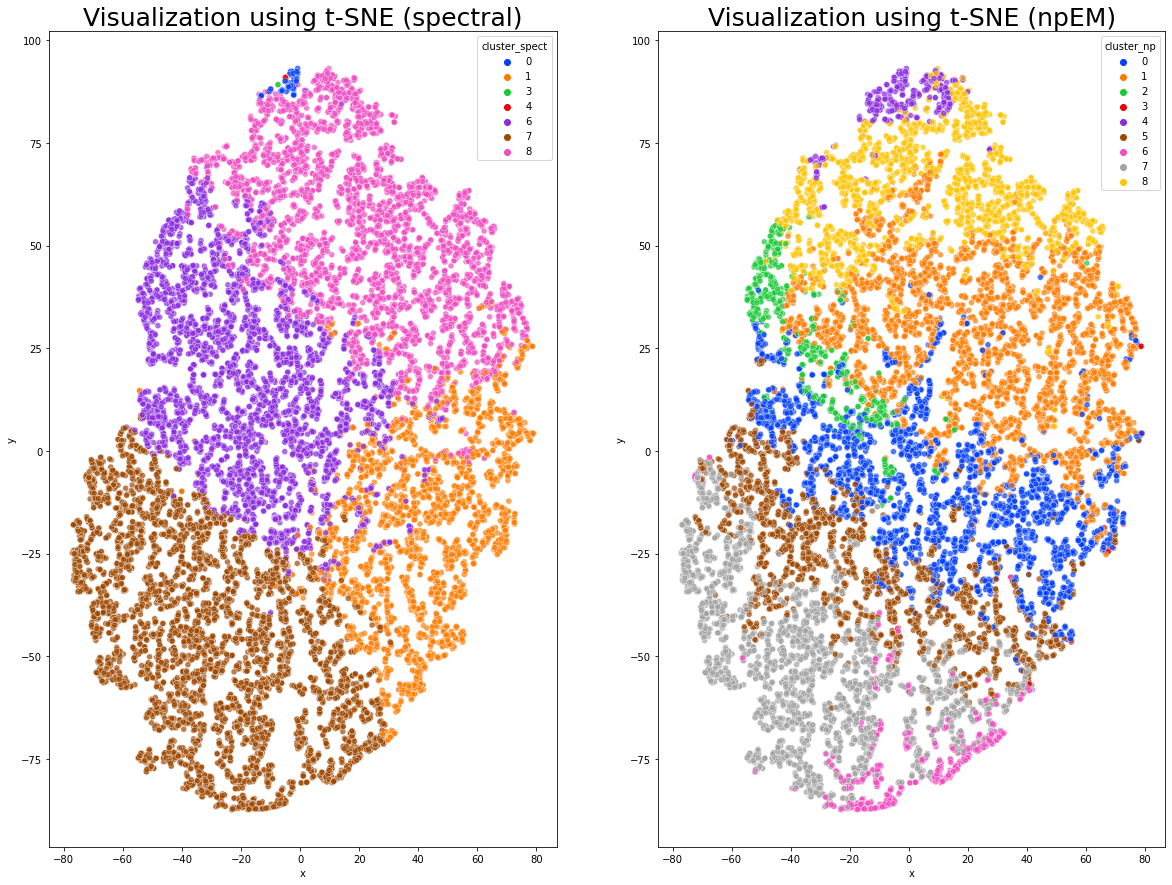

In [5]:
df = pd.DataFrame({
    'x':X_embedded[:,0],
    'y':X_embedded[:,1], 
    'cluster_np':clusters_np,
    'cluster_spect':clusters_spect
})
fig, axs = plt.subplots(ncols=2)
g = sns.scatterplot(data=df ,x='x',y='y' ,hue="cluster_spect",alpha = 0.7,palette='bright',ax=axs[0]);
g.figure.set_size_inches(20,15);
g.set_title("Visualization using t-SNE (spectral)",fontsize=25);
g2 = sns.scatterplot(data=df ,x='x',y='y' ,hue="cluster_np",alpha = 0.7,palette='bright',ax=axs[1]);
g2.figure.set_size_inches(20,15);
g2.set_title("Visualization using t-SNE (npEM)",fontsize=25);

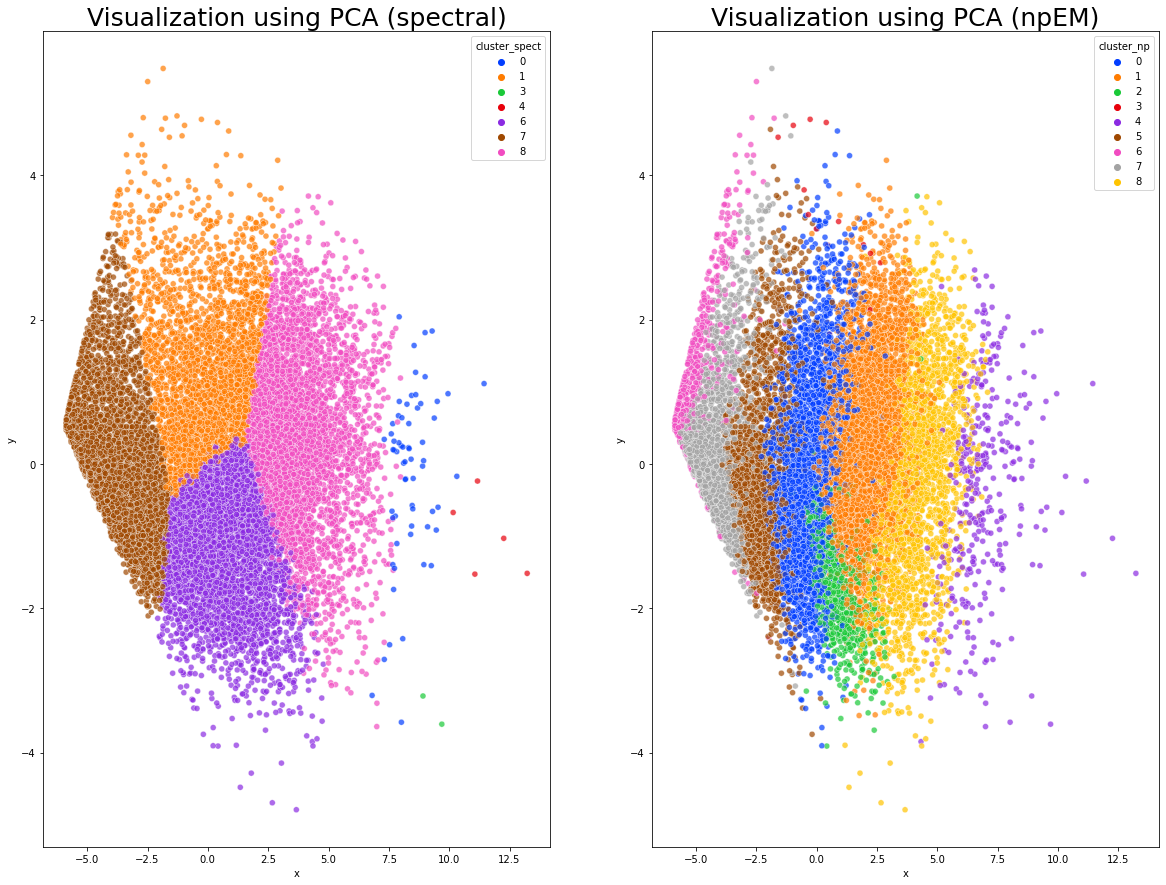

In [6]:
X_pca = PCA(n_components=2).fit_transform(X)
df2 = pd.DataFrame({
    'x':X_pca[:,0],
    'y':X_pca[:,1], 
    'cluster_np':clusters_np,
    'cluster_spect':clusters_spect
})
fig, axs = plt.subplots(ncols=2)
g = sns.scatterplot(data=df2 ,x='x',y='y' ,hue="cluster_spect",alpha = 0.7,palette='bright',ax=axs[0]);
g.figure.set_size_inches(20,15);
g.set_title("Visualization using PCA (spectral)",fontsize=25);
g2 = sns.scatterplot(data=df2 ,x='x',y='y' ,hue="cluster_np",alpha = 0.7,palette='bright',ax=axs[1]);
g2.figure.set_size_inches(20,15);
g2.set_title("Visualization using PCA (npEM)",fontsize=25);

# Proportional size of clusters in each algorithm

In [7]:
# Proportion in npEM
df.cluster_np.value_counts(normalize=True)

1    0.252354
7    0.191605
0    0.182988
8    0.137071
5    0.136825
2    0.041608
6    0.034653
4    0.022035
3    0.000862
Name: cluster_np, dtype: float64

In [8]:
# Proportion in Spectral Clustering
df.cluster_spect.value_counts(normalize=True)

7    0.313289
8    0.258078
6    0.244968
1    0.179356
0    0.003878
4    0.000308
3    0.000123
Name: cluster_spect, dtype: float64